In [1]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\Nitish Borade\ffmpeg-master-latest-win64-gpl\bin\ffmpeg.exe'

In [2]:
from phi.flow import *

In [3]:
smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))  # sampled at cell centers
velocity = StaggeredGrid(0, extrapolation.ZERO, x=32, y=40, bounds=Box(x=32, y=40))  # sampled in staggered form at face centers

INFLOW_LOCATION = tensor([(4, 5), (8, 5), (12, 5), (16, 5)], batch('inflow_loc'), channel(vector='x,y'))
INFLOW = 0.6 * CenteredGrid(Sphere(center=INFLOW_LOCATION, radius=3), extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))

In [4]:
print(f"Smoke: {smoke.shape}")
print(f"Velocity: {velocity.shape}")
print(f"Inflow: {INFLOW.shape}")
print(f"Inflow, spatial only: {INFLOW.shape.spatial}")

Smoke: (xˢ=32, yˢ=40)
Velocity: (xˢ=32, yˢ=40, vectorᶜ=x,y)
Inflow: (inflow_locᵇ=4, xˢ=32, yˢ=40)
Inflow, spatial only: (xˢ=32, yˢ=40)


In [5]:
print(smoke.values)
print(velocity.values)
print(INFLOW.values)

(xˢ=32, yˢ=40) const 0.0
(xˢ=(x=31, y=32), yˢ=(x=40, y=39), vectorᶜ=x,y) const 0.0
(inflow_locᵇ=4, xˢ=32, yˢ=40) 0.015 ± 0.094 (0e+00...6e-01)


<Figure size 1200x500 with 5 Axes>

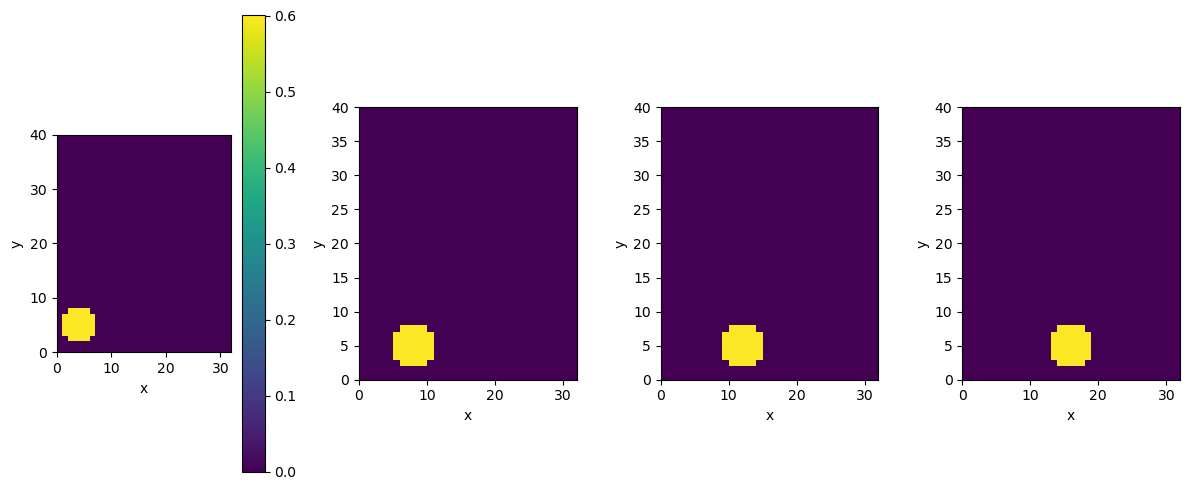

In [6]:
smoke += INFLOW
buoyancy_force = smoke * (0, 0.5) @ velocity
velocity += buoyancy_force
velocity, _ = fluid.make_incompressible(velocity)

vis.plot(smoke)

In [7]:
Trajectory = [smoke]
Velocity   = [velocity]
for i in range(20):
    print(i, end=' ')
    smoke = advect.mac_cormack(smoke, velocity, dt=1) + INFLOW
    buoyancy_force = smoke * (0, 0.5) @ velocity
    velocity = advect.semi_lagrangian(velocity, velocity, dt=1) + buoyancy_force
    velocity, _ = fluid.make_incompressible(velocity)
    Trajectory.append(smoke)
    Velocity.append(velocity)
trajectory = field.stack(Trajectory, batch('time'))
#vis.plot(trajectory, animate='time')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: SyntaxWarning: Automatic conversion of Φ-Flow tensors to NumPy can cause problems because the dimension order is not guaranteed.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Nitish Borade\AppData\Local\Temp\ipykernel_21920\256842093.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Nitish Borade\AppData\Local\Temp\ipykernel_21920\256842093.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig  = plt.figure(figsize=(10,5))


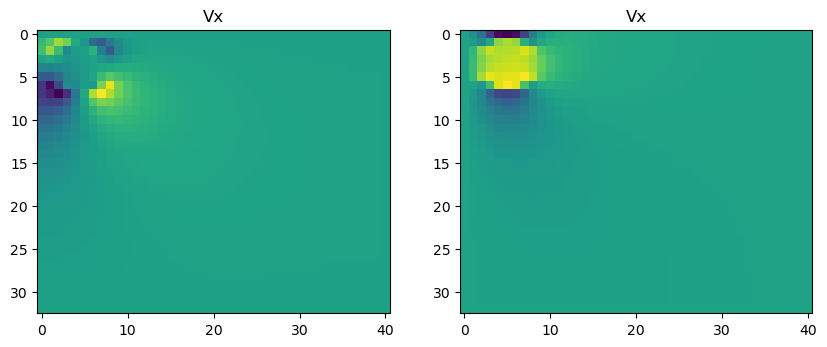

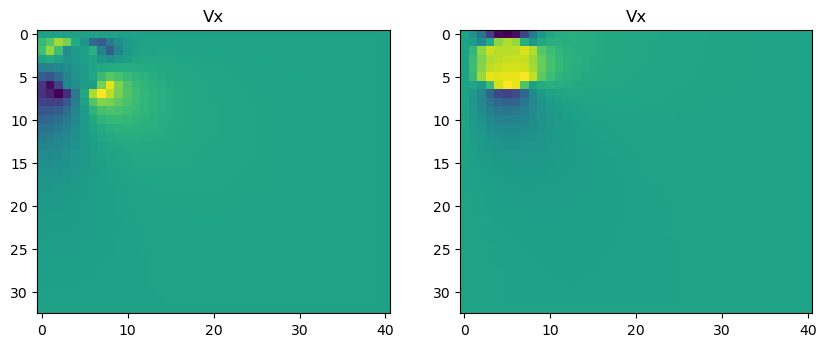

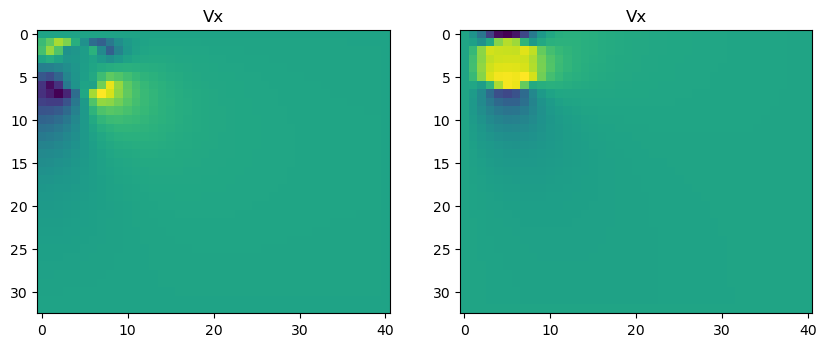

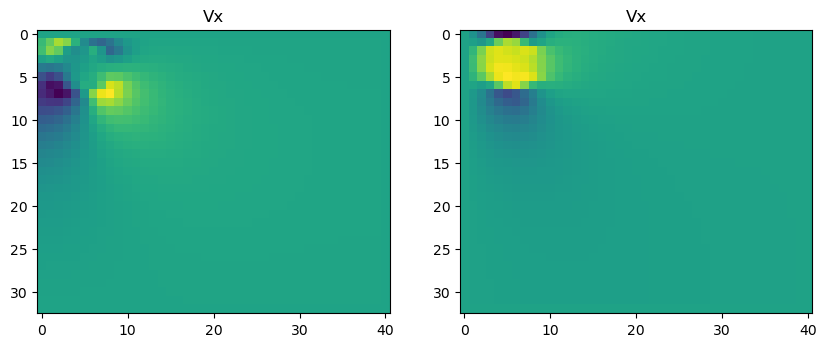

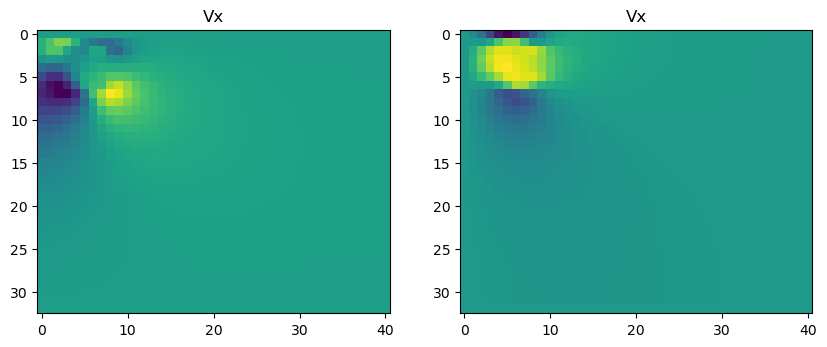

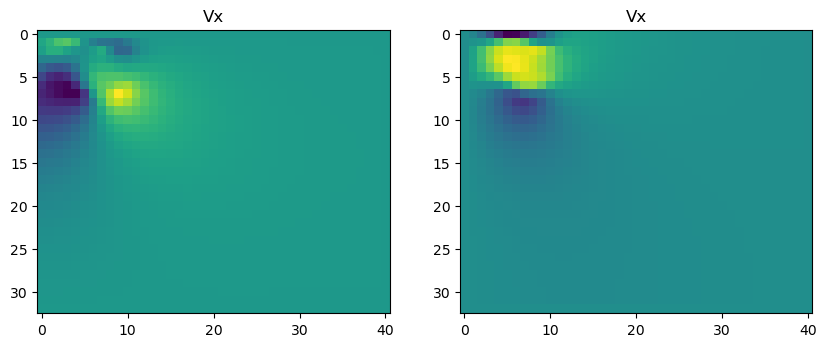

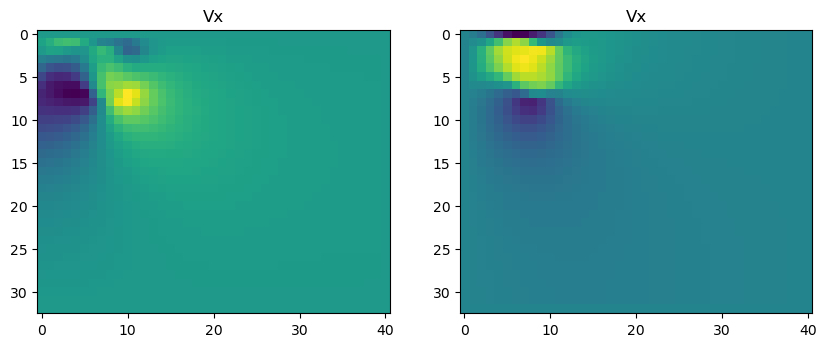

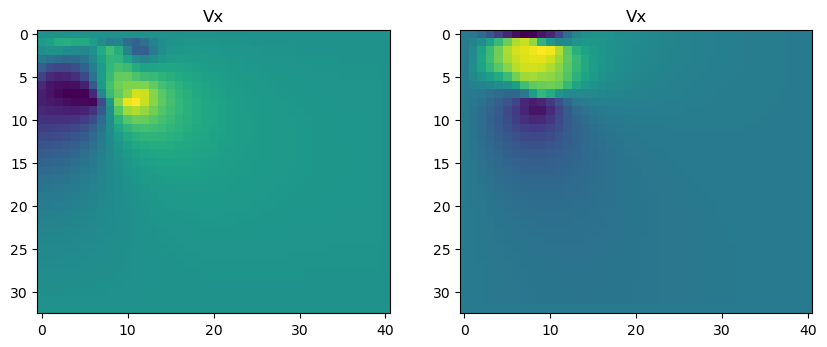

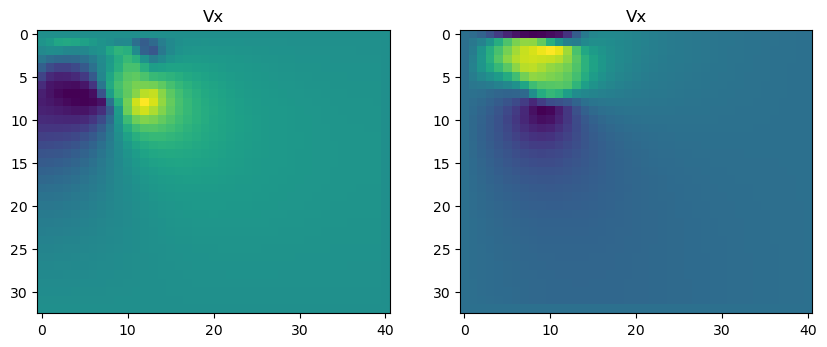

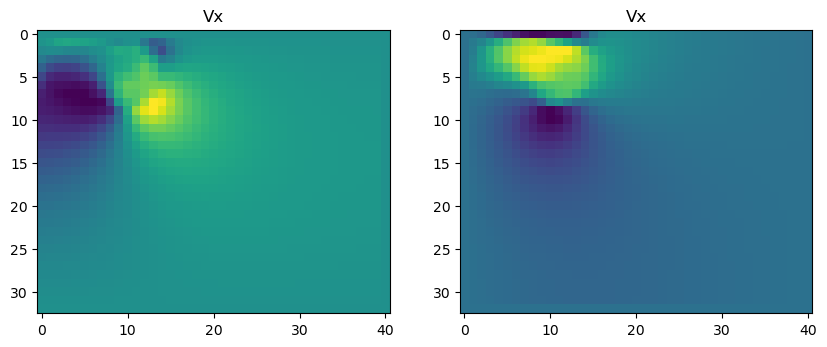

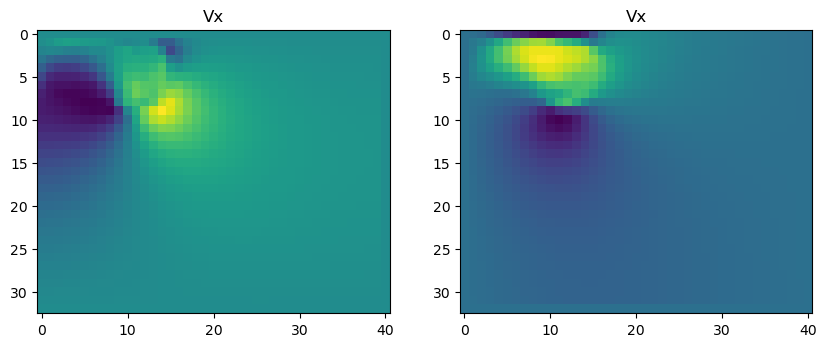

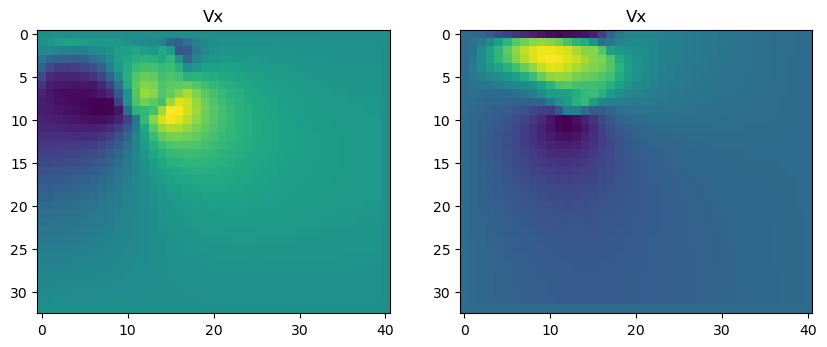

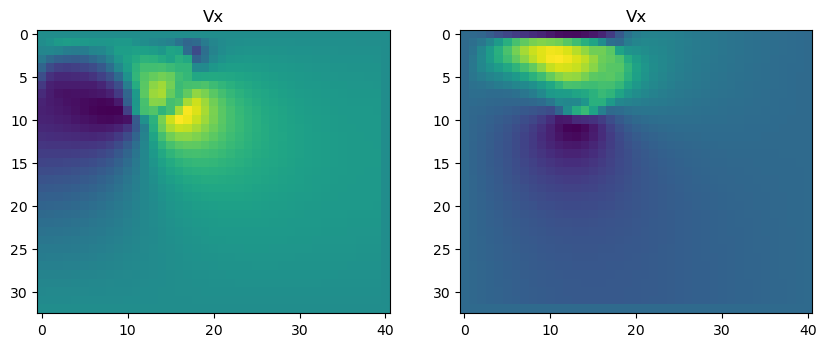

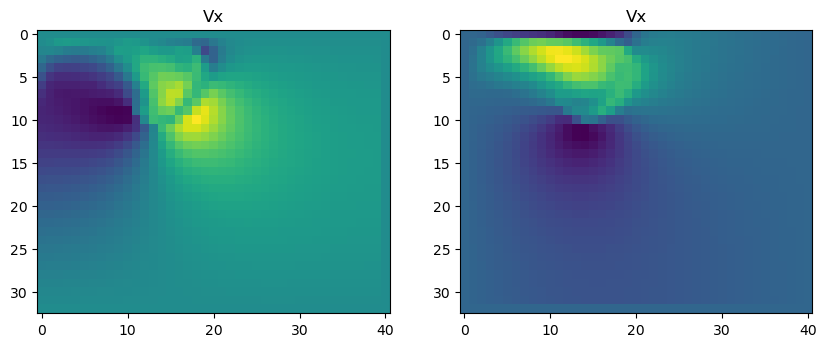

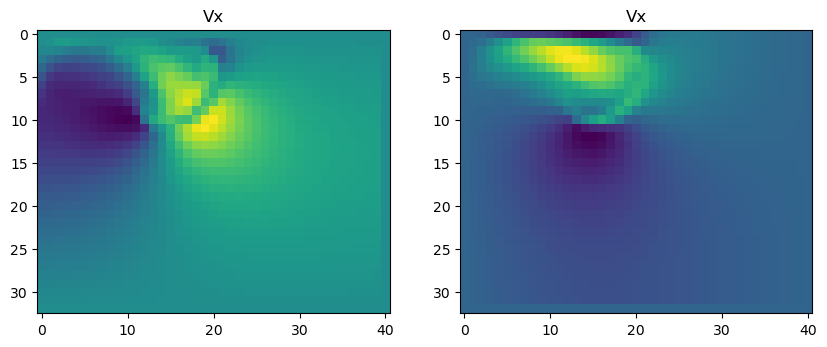

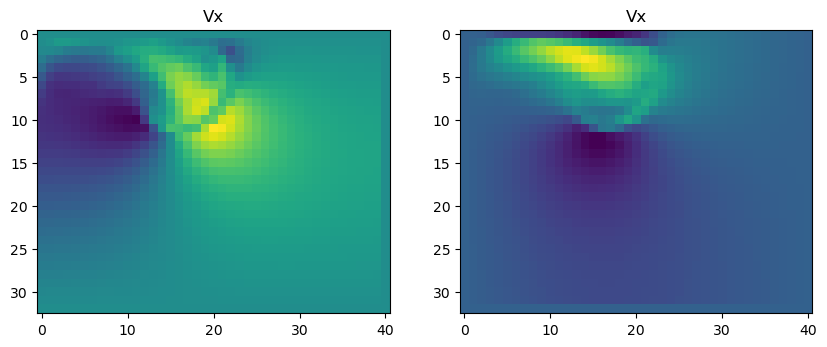

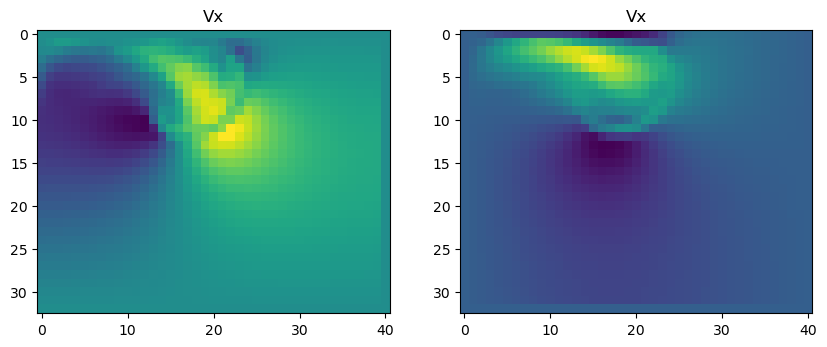

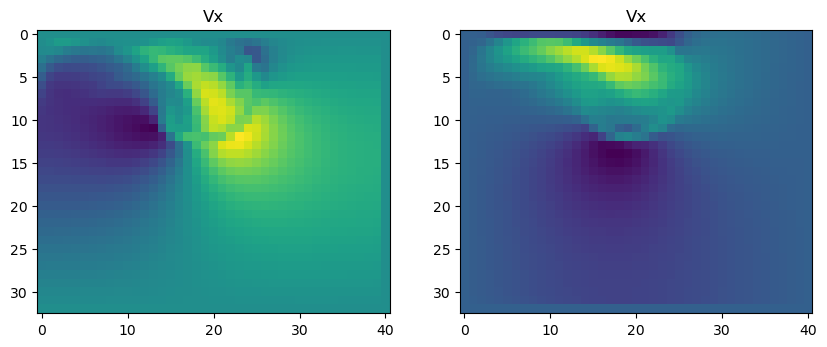

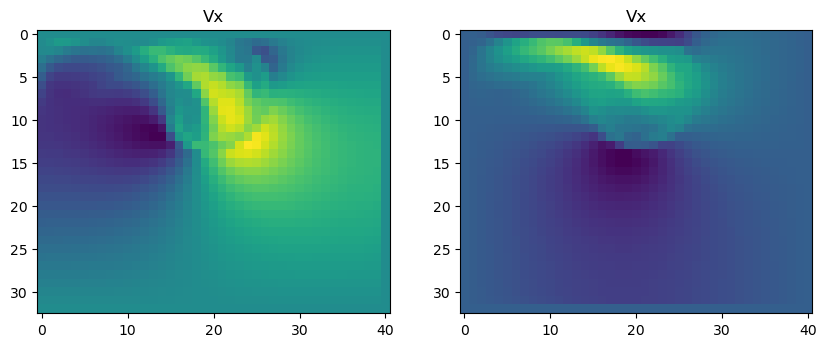

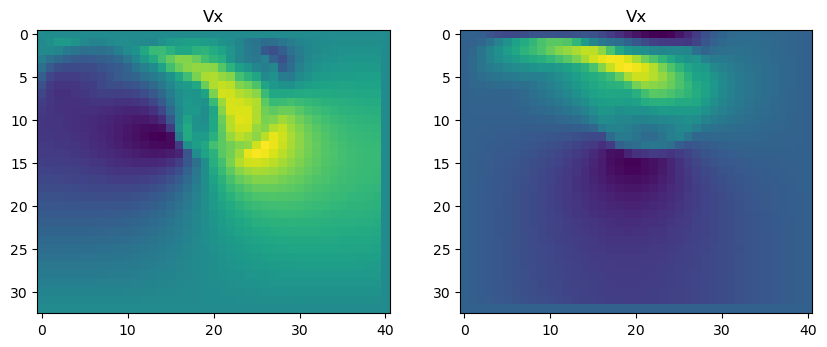

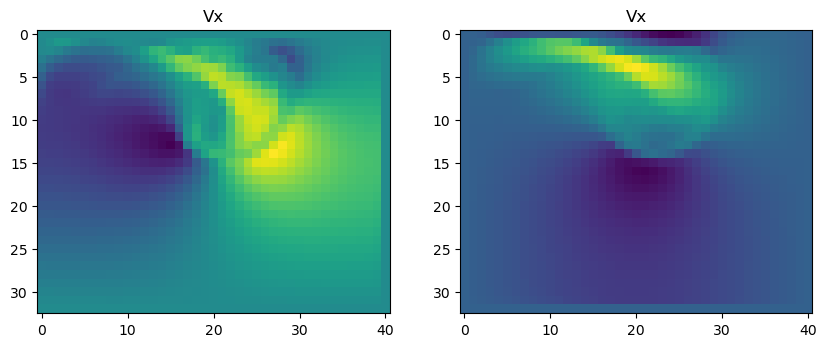

In [13]:
# for smoke in Trajectory:
#     plt.title("Density")
#     plt.imshow(np.array(smoke.data)[0])
#     plt.show()
import matplotlib.pyplot as plt
for velocity in Velocity:
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title("Vx")
    ax1.imshow(np.array(velocity.staggered_tensor())[0][:,:,0])
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title("Vx")
    ax2.imshow(np.array(velocity.staggered_tensor())[0][:,:,1])
    fig.show() 

<Figure size 1000x500 with 0 Axes>